### Import Packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import svm, metrics
import secrets

### Generate Gaussian Distributions

In [11]:
# Create a default random number generator
rng = np.random.default_rng(42672244757883671377369755671764847711)

gaus1 = rng.normal(loc=0.5, scale=0.5, size=(120,8))
gaus2 = rng.normal(loc=1.5, scale=1.5, size=(120,8))
gaus3 = rng.normal(loc=0.5, scale=0.5, size=(120,8))
gaus4 = rng.normal(loc=1.5, scale=1.5, size=(120,8))

print(gaus1, " ", gaus2, " ", gaus3, " ", gaus4)

[[ 7.70297863e-03  4.91167387e-01  1.35915915e+00  5.29667638e-01
   3.73745950e-02  7.66640988e-01  7.10122530e-01  1.98951494e-01]
 [ 2.40117137e-01  9.64799823e-01  4.98226817e-01  7.88864292e-01
  -3.60768158e-01  1.43552806e-01  1.41428528e-01  8.54604201e-01]
 [ 1.13820047e+00  1.01580207e+00  4.69844303e-01  1.31025324e+00
   2.28192520e-01  3.83554418e-01 -2.57750977e-01  3.41467582e-01]
 [ 6.38079610e-01 -8.51500404e-02  1.11118929e+00  1.47662415e+00
   1.18380283e+00  1.32445111e-01  4.87051646e-01  2.35488037e-01]
 [ 7.14872758e-02  2.17248793e-02  5.13915813e-01  3.89061555e-01
   1.74588526e+00  8.78668725e-01  1.12233455e+00  8.20907848e-01]
 [ 4.93572450e-01  7.30450585e-01  6.69870291e-01  6.71473766e-01
   9.27129473e-01 -1.67649083e-01  7.35715638e-01  3.56140317e-01]
 [ 7.10155530e-01  5.09229922e-02  7.78597007e-01  7.53616585e-01
  -4.66134713e-01  2.86617131e-02  1.02873448e-01  5.45601547e-01]
 [ 8.97014693e-01  6.52706137e-01  4.58670077e-01 -2.14410515e-01
   

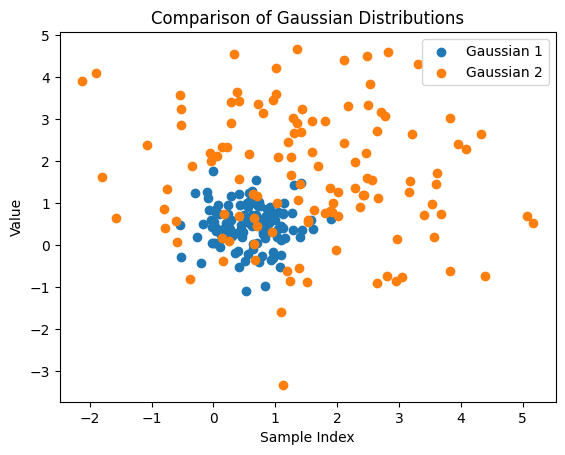

In [5]:
# Create a scatter plot to compare gaus1 and gaus2
plt.scatter(gaus1[:,0], gaus1[:,1], label = 'Gaussian 1')
plt.scatter(gaus2[:,0], gaus2[:,1], label = 'Gaussian 2')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of Gaussian Distributions')
plt.legend()

# Display the plot
plt.show()

### Generate Uniform Distributions

In [13]:
uni1 = rng.uniform(low=0, high=0.4, size=(120,8))
uni2 = rng.uniform(low=0.15, high=0.5, size=(120,8))
uni3 = rng.uniform(low=0, high=0.4, size=(120,8))
uni4 = rng.uniform(low=0.15, high=0.5, size=(120,8))

print(uni1, " ", uni2, " ", uni3, " ", uni4)

[[0.01125208 0.10017662 0.05174351 0.24465271 0.13282601 0.30654505
  0.13931912 0.07346308]
 [0.22158339 0.10595823 0.33470677 0.30425388 0.07420557 0.19835517
  0.36852303 0.37835833]
 [0.35471797 0.38048398 0.03409764 0.32047046 0.37120994 0.39328496
  0.1101669  0.2420347 ]
 [0.04649259 0.07457131 0.34468833 0.17816028 0.06519786 0.03325503
  0.04127051 0.33238853]
 [0.37075031 0.09825927 0.35745415 0.38822754 0.02294357 0.00574805
  0.33499065 0.19651285]
 [0.10150258 0.34428927 0.06262366 0.01528735 0.11674432 0.34515475
  0.25247529 0.03759655]
 [0.28113375 0.00089342 0.05219541 0.10440609 0.28724152 0.0646409
  0.35249518 0.23604099]
 [0.14614103 0.20741646 0.10336077 0.27661168 0.28231041 0.35904647
  0.34965248 0.10964205]
 [0.09581958 0.19656029 0.20360868 0.02134875 0.39035211 0.18462164
  0.18562684 0.03174302]
 [0.08422203 0.00204761 0.36661779 0.2614425  0.29978925 0.39700325
  0.33970104 0.29478374]
 [0.12776292 0.22291516 0.24501462 0.18531229 0.11288894 0.35643734
  0

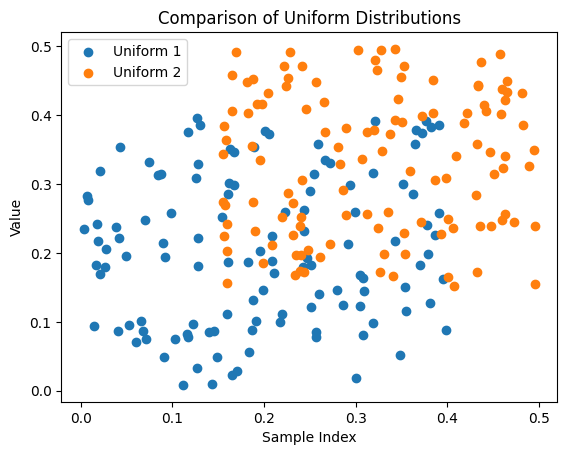

In [8]:
# Create a scatter plot to compare uni1 and uni2
plt.scatter(uni1[:,0], uni1[:,1], label = 'Uniform 1')
plt.scatter(uni2[:,0], uni2[:,1], label = 'Uniform 2')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of Uniform Distributions')
plt.legend()

# Display the plot
plt.show()

### Generate Categorical Distribution

In [17]:
cat1 = rng.poisson(lam=1, size=(240,8))
cat2 = rng.poisson(lam=1, size=(240,8))

print(cat1, " ", cat2)

[[0 1 0 ... 0 1 1]
 [1 0 2 ... 2 0 2]
 [1 0 2 ... 2 0 3]
 ...
 [1 1 1 ... 1 0 0]
 [0 0 0 ... 1 3 1]
 [3 1 1 ... 2 0 0]]   [[4 2 1 ... 1 2 2]
 [2 1 1 ... 2 0 2]
 [0 0 2 ... 1 0 1]
 ...
 [1 1 2 ... 2 0 0]
 [0 2 1 ... 4 3 0]
 [1 0 0 ... 0 1 2]]


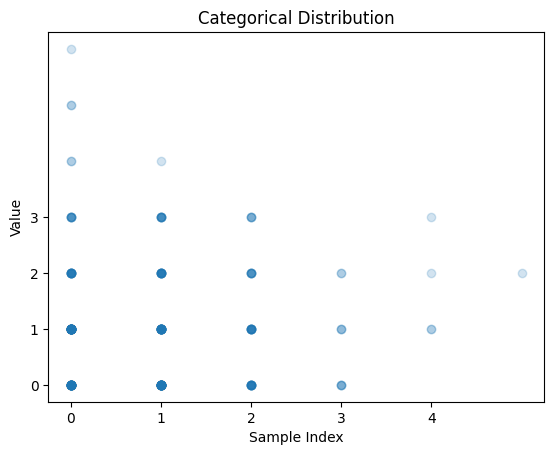

In [11]:
# Create a scatter plot to compare uni1 and uni2
plt.scatter(cat1[:,0], cat1[:,1], alpha=0.2)

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.yticks(range(0, 4))
plt.title('Categorical Distribution')
plt.xticks(range(0, 5))

# Display the plot
plt.show()

### Combine the Datasets

In [18]:
stacked_gaus = np.vstack((gaus1, gaus2))
stacked_uni = np.vstack((uni1, uni2))

zeros_column = np.zeros((120, 1)).astype(int)
ones_column = np.ones((120,1)).astype(int)
label_column = np.vstack((zeros_column, ones_column))

stacked_all = np.hstack((stacked_gaus, stacked_uni, cat1, label_column))

print(stacked_all.shape)

(240, 25)


In [21]:
stacked_gaus2 = np.vstack((gaus3, gaus4))
stacked_uni2 = np.vstack((uni3, uni4))

zeros_column2 = np.zeros((120, 1)).astype(int)
ones_column2 = np.ones((120,1)).astype(int)
label_column2 = np.vstack((zeros_column2, ones_column2))

stacked_all2 = np.hstack((stacked_gaus2, stacked_uni2, cat2, label_column2))

print(stacked_all2.shape)

(240, 25)


In [25]:
combined_data2 = pd.DataFrame(stacked_all2)
X_train, X_test, y_train, y_test = train_test_split(combined_data2.iloc[:, :-1], combined_data2.iloc[:, -1], test_size = 0.3, random_state = 42)
print(X_train)

           0         1         2         3         4         5         6   \
29  -0.004740  0.732610  0.377775  0.377098  1.394145  0.953744  0.818293   
124  0.874165 -0.172643 -0.142987  2.348506 -0.457176  0.154678  2.122514   
75   1.229259  0.852164  0.614184 -0.361661 -0.158442  0.776591 -0.026957   
82  -0.005780 -0.368467  1.081287  0.553534  0.776794  0.631476  0.030475   
5   -0.654703 -0.115635  0.928184  0.126589 -0.171161  1.029253 -0.017596   
..        ...       ...       ...       ...       ...       ...       ...   
106  0.725881  0.226920  0.593376  1.218614  0.643722  0.605785  0.606095   
14   0.081370  0.787249  0.128283  1.020276  0.946420 -0.540146  0.236173   
92   0.536066  0.749874  1.296587  0.648749  0.347486  0.243578 -0.864052   
179  2.049820  1.289579  1.343023  1.791718  1.521847  0.954168 -0.819556   
102  0.446615  0.975064  1.258130  0.842881  0.313994 -0.446068  0.349199   

           7         8         9   ...        14        15   16   17   18  

In [ ]:
stacked_x = np.vstack((X_train, X_test))
stacked_y = np.vstack((np.array(y_train)[:,np.newaxis], np.array(y_test)[:,np.newaxis]))

stacked_all = np.hstack((stacked_x, stacked_y))
print(stacked_all.shape)
#np.savetxt('stacked_all.csv', stacked_all, delimiter=',')

In [29]:
stacked_x2 = np.vstack((X_train, X_test))
stacked_y2 = np.vstack((np.array(y_train)[:,np.newaxis], np.array(y_test)[:,np.newaxis]))

stacked_all2 = np.hstack((stacked_x2, stacked_y2))
print(stacked_all2.shape)
#np.savetxt('stackedall.csv', stacked_all2, delimiter=',')

(240, 25)


In [26]:
# Create SVM classifier instance with linear kernel
clf = svm.SVC(kernel='linear', random_state = 42)

# Train the model using the training sets
clf.fit(X_train.iloc[:,0:], y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test.iloc[:,0:])

# Print predictions
print("Predictions:", y_pred)

# Calculate F1 score
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Predictions: [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
F1 Score: 0.8181818181818181
